# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Vishal Gupta

EID: vg22846

Name: Kaushik Kumaran

EID: kk34537

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = int(n_epoch)
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        self.mse = []
        self.coefs = []
        self.past_gradient = np.zeros(num_of_coefs) # to be used for momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama * self.cache + (1 - self.gama) * np.square(gradient)
        self.coef = self.coef - self.learning_rate * gradient * np.sqrt((np.reciprocal(self.cache + self.eps)))
        
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.past_gradient = (self.mu * self.past_gradient + self.learning_rate * gradient)
        self.coef = self.coef - self.past_gradient
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                errors = y[i] - self.linearPredict(X[i, :])

                # Compute gradients
                gradient = - errors * X[i, :] + self.regularization * np.array(
                    [0, self.coef[1], self.coef[2],  self.coef[3],  self.coef[4],  self.coef[5]])

                # Update weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                elif update_rule == 'rmsprop':
                    self.rmsprop(gradient)
                
            self.coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            self.mse.append(np.mean(residuals**2))
        
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch), self.mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.title('Learning rate = {}, Regularization = {}, Algo = {}'.format(
                self.learning_rate,self.regularization, update_rule))
            plt.figure()
            coefs = np.array(self.coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.title('Learning rate = {}, Regularization = {}, Algo = {}'.format(
                self.learning_rate,self.regularization, update_rule))

    def get_features(self, X):
       x = np.zeros((X.shape[0], num_of_coefs))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''
       return np.dot(X_features, self.coef)

In [3]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30.
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

In [5]:
# creating list for rmsprop and momentum
gdo_algo = ['sgd_momentum', 'rmsprop']

# creating output dataframe for recording errors
from itertools import product
output_df = pd.DataFrame(product([n_epochs], learning_rate, regularization, gdo_algo), 
                         columns=['n_epochs', 'learning_rate', 'regularization', 'gdo_algo'])
mses = []

# iterating over different hyperparameters
for epoch, lr, reg, algo in output_df.values:
    model = LinearRegression(lr, reg, epoch)
    model.fit(X, y, update_rule=algo)
    
    # train predictions
    y_pred = model.linearPredict(model.get_features(X))
    
    # rmse
    mse = np.mean((y - y_pred)**2)
    mses.append(mse)

output_df['mse'] = mses
output_df

<ipython-input-2-2a60718458c2>:72: RuntimeWarning: overflow encountered in square
  self.mse.append(np.mean(residuals**2))
<ipython-input-2-2a60718458c2>:61: RuntimeWarning: overflow encountered in multiply
  gradient = - errors * X[i, :] + self.regularization * np.array(
<ipython-input-2-2a60718458c2>:61: RuntimeWarning: invalid value encountered in multiply
  gradient = - errors * X[i, :] + self.regularization * np.array(
<ipython-input-2-2a60718458c2>:36: RuntimeWarning: invalid value encountered in add
  self.past_gradient = (self.mu * self.past_gradient + self.learning_rate * gradient)


,n_epochs,learning_rate,regularization,gdo_algo,mse
0,30.0,0.0001,0.00,sgd_momentum,0.020581
1,30.0,0.0001,0.00,rmsprop,0.021243
2,30.0,0.0001,0.01,sgd_momentum,0.020547
3,30.0,0.0001,0.01,rmsprop,0.021160
4,30.0,0.0001,0.10,sgd_momentum,0.020418
5,30.0,0.0001,0.10,rmsprop,0.020850
6,30.0,0.0010,0.00,sgd_momentum,0.020196
7,30.0,0.0010,0.00,rmsprop,0.020203
8,30.0,0.0010,0.01,sgd_momentum,0.020209
9,30.0,0.0010,0.01,rmsprop,0.020215


Learning rate =  0.001 Regularization constant =  0.0
Learning rate =  0.001 Regularization constant =  0.01
Learning rate =  0.001 Regularization constant =  0.0
Learning rate =  0.001 Regularization constant =  0.01


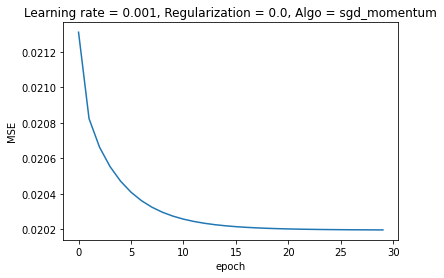

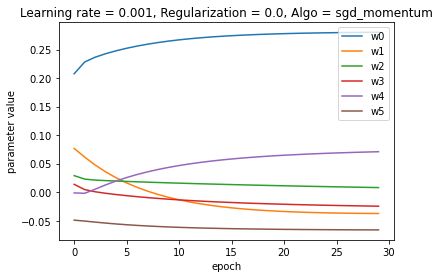

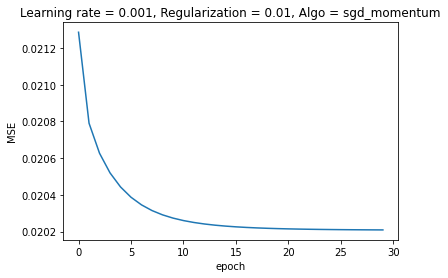

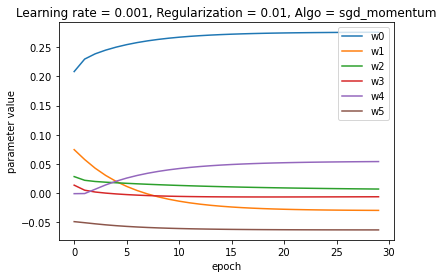

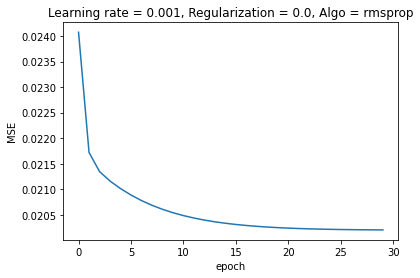

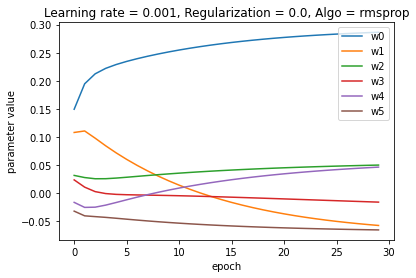

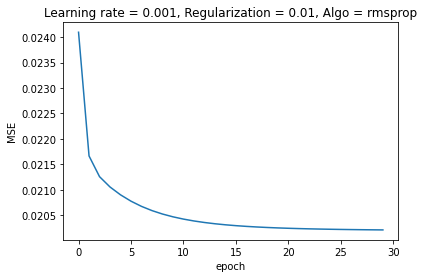

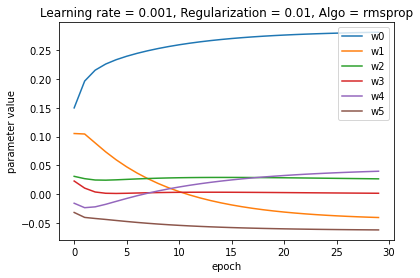

In [6]:
# getting 2 best model parameters for sgd momentum
best_params_sgd = output_df.query('gdo_algo == "sgd_momentum"').sort_values('mse').head(2)

for epoch, lr, reg, algo, _ in best_params_sgd.values:
    print('Learning rate = ', lr, 'Regularization constant = ', reg)
    model = LinearRegression(learning_rate=lr, regularization=reg, n_epoch=epoch)
    model.fit(X, y, update_rule=algo, plot=True)
    
# getting 2 best model parameters for sgd momentum
best_params_rms = output_df.query('gdo_algo == "rmsprop"').sort_values('mse').head(2)

for epoch, lr, reg, algo, _ in best_params_rms.values:
    print('Learning rate = ', lr, 'Regularization constant = ', reg)
    model = LinearRegression(learning_rate=lr, regularization=reg, n_epoch=epoch)
    model.fit(X, y, update_rule=algo, plot=True)

In [7]:
best_params = pd.concat([best_params_sgd, best_params_rms], axis=0)
best_params

,n_epochs,learning_rate,regularization,gdo_algo,mse
6,30.0,0.001,0.00,sgd_momentum,0.020196
8,30.0,0.001,0.01,sgd_momentum,0.020209
7,30.0,0.001,0.00,rmsprop,0.020203
9,30.0,0.001,0.01,rmsprop,0.020215


### Comparison of SGD momentum with RMS prop - 
* For smaller values of learning rate parameter, SGD momentum seems to be performing slightly better than the RMS prop
* For higher values of learning rate parameter, SGD momentum gradient explodes and the weights become huge. This makes SGD momentum to not converge to a point hence no solution
* RMS prop on the other hand performs significantly better at higher learning rates with a decent dip in the MSE value, but the performance doesn't deteriote as dramatically as it does for SGD momentum
* For learning faster with same number of epochs (or iterations) RMS prop appears to be a superior gradient descent optimization algorithm

# Answer:

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

### Part A
With Linear activation function, the decision boundary are not good enough to seperate the data into two classification and loss values are high. While with Tanh activation function, decision boundaries are a lot clear and it is able to clearly separate the Blue and Orange class with high accuracy. The model with Tanh activation have significatly lower loss compared to linear.

Model with linear activation function is giving high loss value is due to the inherent nature and segragation of the two class w.r.t the two classes. The underlying decision boundary appears to be linear but it needs two such linear boundaries to decently segregate the two classes, which the linear activation function is not able to achieve.

![](q2pa1.jpg)
![](q2pa2.jpg)

### Part B

As the number of neurons is increased from 4 to 8, the model is able to classify the classes more accurately and model loss recuded significantly. As we can see in the hidden layer, each neuron creates a linear decision boundary that are combined using the Tanh activation function. With increase number of neurons in the hidden layer, the decision boundary became more complex as it is a non-linear combination of each neuron's decision boundary making it easier classify the two classes.

![](q2pb1.jpg)
![](q2pb2.jpg)

### Part C

In [8]:
learning_rate = [10, 1, 0.1, 0.01, 0.001]
train_loss_100n = [0.456, 0.000, 0.009, 0.104, 0.360]
test_loss_100n =  [0.560, 0.012, 0.015, 0.109, 0.356]
accuracy_100n = pd.DataFrame(data={
    'n_epochs': [100]*5,
    'learning_rate': learning_rate,
    'train_loss_100n': train_loss_100n,
    'test_loss_100n': test_loss_100n
})

train_loss_1000n = [0.552, 0.000, 0.000, 0.008, 0.113]
test_loss_1000n =  [0.475, 0.002, 0.000, 0.014, 0.136]
accuracy_1000n = pd.DataFrame(data={
    'n_epochs': [1000]*5,
    'learning_rate': learning_rate,
    'train_loss_100n': train_loss_1000n,
    'test_loss_100n': test_loss_1000n
})

accuracy = pd.concat([accuracy_100n, accuracy_1000n], axis=0)
accuracy


,n_epochs,learning_rate,train_loss_100n,test_loss_100n
0,100,10.000,0.456,0.560
1,100,1.000,0.000,0.012
2,100,0.100,0.009,0.015
3,100,0.010,0.104,0.109
4,100,0.001,0.360,0.356
0,1000,10.000,0.552,0.475
1,1000,1.000,0.000,0.002
2,1000,0.100,0.000,0.000
3,1000,0.010,0.008,0.014
4,1000,0.001,0.113,0.136


**Change of loss vs learning rate** - 

For higher learning rate, loss values are high that decreseas as we decrease the learning rate. For higher learning rate the fluctuations in the gradient descent can possible be the cause for higher losses. An optimal loss is obtained after reducing the learning rate to 1 or 0.1 after that the loss starts to increase again due to very slow learning rate which might require higher number of epochs

**Change of loss vs epoch numbers**

Increase in epoch number is leading to further decrease in losses keeping all the other parameters constant. This is observed consistently for the different learning rate. Higher number of epochs implies more steps taken toward the optimal point with least loss.

### Part D

![](q2pd1.jpg)

The best performance is obtained using the interaction feature of X1 and X2. Since the actual decision boundary are seperated like the X1X2 neuron, it made it easier to attain low loss rather quickly in 100 epochs. 

Using a quadratic components as feature for both X1 and X2 also helped in reducing the loss with lesser epochs. Just using one of the square feature limits to complete cover the blue class and segregate the same with the orange class.

Increasing the number of epochs definitely helped in reducing the losses for cases that learnt from data rather slowly.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [9]:
# install pyod using pip first
!pip install pyod

You should consider upgrading via the 'c:\users\gupta\anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [11]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE
clf.fit(X_train, y_train)

raw_outlier_score = clf.decision_function(X_test)

C:\Users\gupta\anaconda3\lib\site-packages\pyod\models\base.py:343: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [12]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
evaluate_print(clf, y_test, raw_outlier_score)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


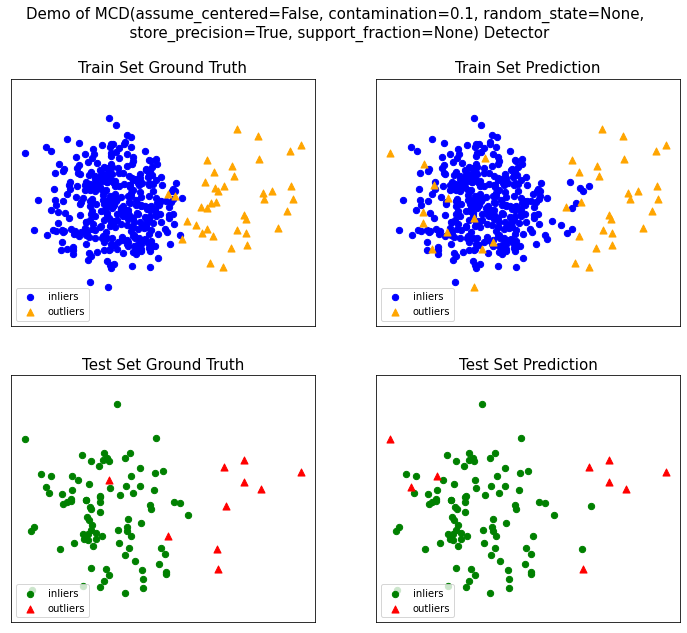

In [13]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
visualize(
    clf,
    train_principalComponents,
    y_train,
    test_principalComponents,
    y_test,
    clf.predict(X_train),
    clf.predict(X_test))

C:\Users\gupta\anaconda3\lib\site-packages\pyod\models\base.py:343: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9167, precision @ rank n:0.6


C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


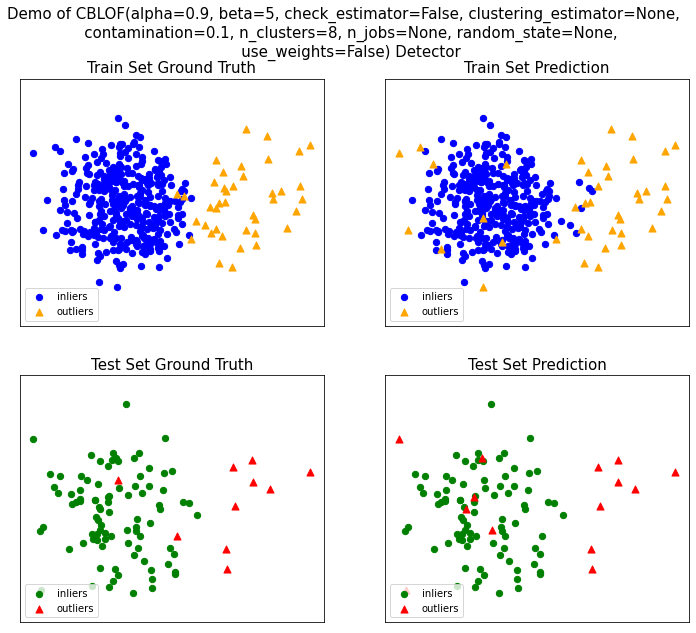

In [14]:
# (c)
from pyod.models.cblof import CBLOF

# creating cblof object for training testing
clf2 = CBLOF()
clf2.fit(X_train, y_train)

# getting raw outlier scores
evaluate_print(clf2, y_test, clf2.decision_function(X_test))

# Visualize the ground truth outliers and predicted outliers using visualize()
visualize(
    clf2,
    train_principalComponents,
    y_train,
    test_principalComponents,
    y_test,
    clf2.predict(X_train),
    clf2.predict(X_test))

C:\Users\gupta\anaconda3\lib\site-packages\pyod\models\base.py:343: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


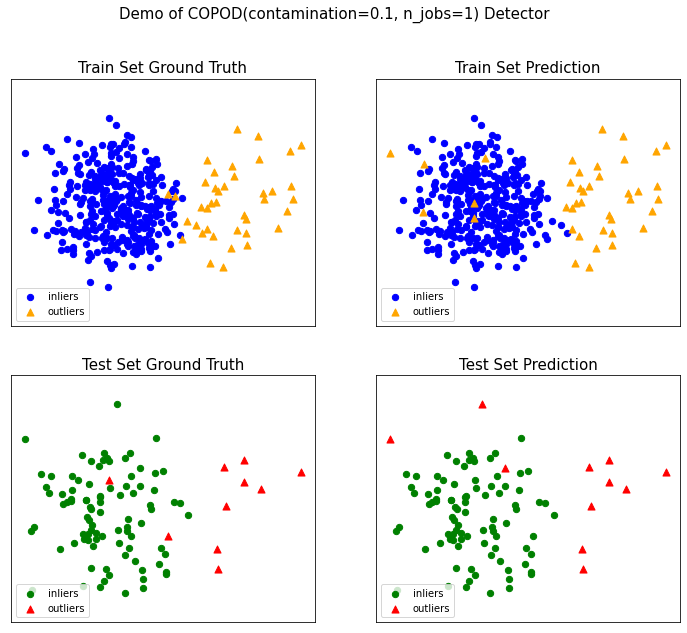

In [15]:
# (c)
from pyod.models.copod import COPOD

# creating cblof object for training testing
clf3 = COPOD()
clf3.fit(X_train, y_train)

# getting raw outlier scores
evaluate_print(clf3, y_test, clf3.decision_function(X_test))

# Visualize the ground truth outliers and predicted outliers using visualize()
visualize(
    clf3,
    train_principalComponents,
    y_train,
    test_principalComponents,
    y_test,
    clf3.predict(X_train),
    clf3.predict(X_test))

**Performance of the three models tried are -**
1. MCD -> ROC:0.8689, precision @ rank n:0.6
2. CBLOF -> ROC:0.8656, precision @ rank n:0.5
3. COPOD -> ROC:0.9556, precision @ rank n:0.8

Looking at the ROC and Precision @ rank n value, COPOD performs better amongh the three.

Both MCD & CBLOF does misclassification for both outliers and inlier similary. But for COPOD these misclassification reduces significantly. Looking the 2-D visualization using Principal components, In MCD and COPOD, test set prediction seems to work significantly better with inlier that are well within the group get classified as outlier. Though the same can't be said for MCD in training set. 

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:
Principal Component Analysis is primarily a dimention reduction techniques that transform the input data from one subspace to another low dimension space by creating componenets which are linear combination of original features. The reduced dimension space thus obtained tries to explain the maximum variance in the original data. 

Principal Component Analysis achieves this by doing the eigen-decomposition of data covariance matrix of mean scaled features. Covariance matrix contains the covariance of two variables with diagonal elements the variance of respective variable. By leveraging Scaler Vector Decomposition (SVD), the covariance matrix is decomposed that gives two matrix - a unitary matrix and a diagonal matrix. The diagonal matrix represents the variance of principal components and the unitary matrix provides loading for converting feature to principal components. By removing covariance between the features we obtain the principal components, the best possible projection that can be obtained. The components thus obtained can be sorted based on the descreasing order of their variance thereby maximizing the information that principal components can explain. 



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [16]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [17]:
missing_data_col = data.isna().sum()
missing_data_col

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [18]:
# creating bins
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                                    labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                    include_lowest=True)

# create one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(data_dm[['binned_yr_built']])
yr_built_ohe = pd.DataFrame(ohe.transform(data_dm[['binned_yr_built']]).toarray(), columns=ohe.get_feature_names())
print(yr_built_ohe.head())

# removing the columns with na name
yr_built_ohe.drop('x0_nan', axis=1, inplace=True)

# combining two df
data_dm = pd.concat([data_dm, yr_built_ohe], axis=1)
data_dm.head()

   x0_1900-1920  x0_1920-1940  x0_1940-1960  x0_1960-1980  x0_1980-2000  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           1.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           1.0   

   x0_2000-2020  x0_nan  
0           1.0     0.0  
1           0.0     0.0  
2           1.0     0.0  
3           0.0     0.0  
4           0.0     0.0  


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MoSold,YrSold,SalePrice,binned_yr_built,x0_1900-1920,x0_1920-1940,x0_1940-1960,x0_1960-1980,x0_1980-2000,x0_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,2,2008,208500,2000-2020,0.0,0.0,0.0,0.0,0.0,1.0
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,5,2007,181500,1960-1980,0.0,0.0,0.0,1.0,0.0,0.0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,9,2008,223500,2000-2020,0.0,0.0,0.0,0.0,0.0,1.0
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,2,2006,140000,1900-1920,1.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,12,2008,250000,1980-2000,0.0,0.0,0.0,0.0,1.0,0.0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [19]:
# identiyfing missing columns based on condition
missing_data_col /= data.shape[0]
cols_to_remove = missing_data_col[missing_data_col >= 0.65].index
print(cols_to_remove)

# dropping the columns
data_dm = data_dm.drop(cols_to_remove, axis=1)
data_dm.head()

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MoSold,YrSold,SalePrice,binned_yr_built,x0_1900-1920,x0_1920-1940,x0_1940-1960,x0_1960-1980,x0_1980-2000,x0_2000-2020
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,2,2008,208500,2000-2020,0.0,0.0,0.0,0.0,0.0,1.0
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,5,2007,181500,1960-1980,0.0,0.0,0.0,1.0,0.0,0.0
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,9,2008,223500,2000-2020,0.0,0.0,0.0,0.0,0.0,1.0
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,2,2006,140000,1900-1920,1.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,12,2008,250000,1980-2000,0.0,0.0,0.0,0.0,1.0,0.0



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [20]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean

print(sample_ages.mean())

#Population mean
print(data['SalePrice'].mean())

# TODO: WHAT DOES HE MEAN BY COMPARISION

178292.63125
180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [21]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
import scipy.stats as st
z_critical = st.norm.ppf(.975)

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print(sample_mean, confidence_interval)

182092.53 (166522.08555078227, 197662.97444921773)


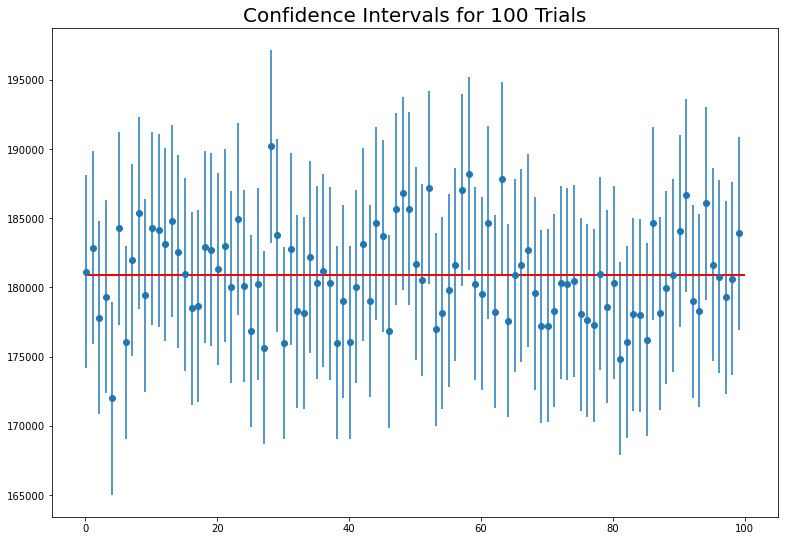

In [22]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = st.norm.ppf(.975)

    # compute population standard deviation 
    pop_stdev = data_dm['SalePrice'].std()
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

The confidence interval obtained ensures that the population mean should be within the sample range atleast 95% of the times. Looking at the plot sample range and population mean we observe that only 4 out of 100 sample does not capture the population mean that is more than 95%.